In [0]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Data fields**
* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : 집이 얼마나 좋아 보이는지의 정도
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [6]:
print(train.shape)
print(test.shape)

(15035, 21)
(6555, 20)


In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [0]:
X_all = train.drop(['price'], axis=1)   # axis=1 : 열에 대해서. 'price'라는 열을 제거해줌
y = train['price']

In [9]:
X_all.info()   # 결측치 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   bedrooms       15035 non-null  int64  
 3   bathrooms      15035 non-null  float64
 4   sqft_living    15035 non-null  int64  
 5   sqft_lot       15035 non-null  int64  
 6   floors         15035 non-null  float64
 7   waterfront     15035 non-null  int64  
 8   view           15035 non-null  int64  
 9   condition      15035 non-null  int64  
 10  grade          15035 non-null  int64  
 11  sqft_above     15035 non-null  int64  
 12  sqft_basement  15035 non-null  int64  
 13  yr_built       15035 non-null  int64  
 14  yr_renovated   15035 non-null  int64  
 15  zipcode        15035 non-null  int64  
 16  lat            15035 non-null  float64
 17  long           15035 non-null  float64
 18  sqft_l

In [0]:
# sqft_living : 주거 공간의 평방 피트(면적)
# sqft_lot : 부지의 평방 피트(면적)

sel = ['sqft_living', 'sqft_lot']
X = X_all[sel]
y = train['price']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=5,   # 5개의 트리
                              random_state=2)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8891684367300677

In [16]:
# 학습된 랜덤포레스트의 트리 모델
print(model.estimators_)   # 다섯개의 트리가 순서대로 리스트에 들어가있음

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1872583848, splitter='best'), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=794921487, splitter='best'), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.

In [17]:
# 변수의 중요도
model.feature_importances_   # sqft_living, sqft_lot

array([0.70828583, 0.29171417])

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def plot_feature_imp_cancer_up(model, feature_num, feature_names):
  n_features = feature_num    # feature(변수의 개수)
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

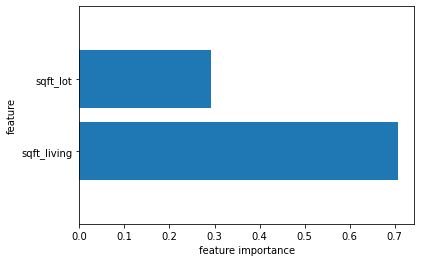

In [21]:
feature_n = 2
feature_names = sel
plot_feature_imp_cancer_up(model, feature_n, feature_names)

In [22]:
# 100개의 트리
model_100 = RandomForestRegressor(n_estimators=100, 
                              random_state=2)
model_100.fit(X_train, y_train)
model_100.score(X_train, y_train)

0.9301887697919391

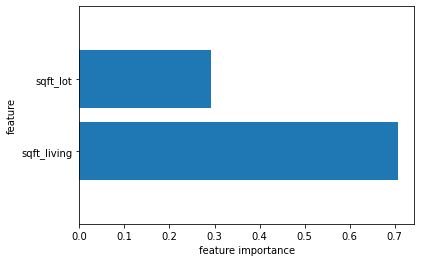

In [23]:
feature_n = 2
feature_names = sel
plot_feature_imp_cancer_up(model, feature_n, feature_names)

### **모델 성능 개선**

* 변수 선택. 상관관계가 높고, 서로 독립인 변수를 선택
* 하이퍼 파라미터 n_estimators 등을 수정


In [58]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9576441469387684
0.6539029530150079


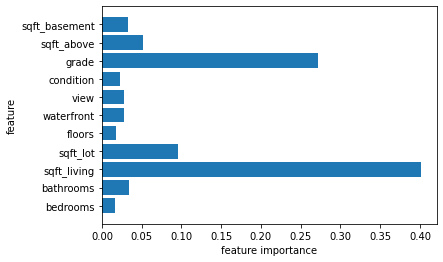

In [50]:
feature_n = len(sel)
feature_names = sel
plot_feature_imp_cancer_up(model, feature_n, feature_names)

In [59]:
sel = ['sqft_living','grade']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7516131131412682
0.4809821629359723


In [66]:
sel = ['sqft_living','grade', 'sqft_lot']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.94072373198343
0.5332579509105597


In [67]:
sel = ['sqft_living', 'sqft_lot']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9301887697919391
0.4362240245501182


In [60]:
sel = ['floors', 'sqft_living', 'sqft_lot']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.933404197195794
0.4613334587646498


In [61]:
sel = ['view', 'sqft_living', 'sqft_lot']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9372737815114476
0.5068391146343907


In [62]:
sel = ['floors', 'view', 'sqft_living', 'sqft_lot']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9401017726464477
0.5258401460575088


In [63]:
sel = ['sqft_living', 'sqft_lot', 'grade']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9407233227473534
0.5332520155796645


In [64]:
sel = ['sqft_living', 'sqft_lot', 'grade', 'condition']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9466466389657495
0.5662960281508885


In [65]:
sel = ['sqft_living', 'sqft_lot', 'bathrooms']
X = X_all[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9375795067541653
0.46603197510341576
